## DIY - Sampler 

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def post(theta, X, alpha= 1, beta= 1):
 if 0 <= theta <= 1:
  prior = stats.beta(alpha, beta).pdf(theta)
  like = stats.bernoulli(theta).pmf(X).prod()
  prob = like * prior
 else:
  prob = -np.inf
 return prob

In [3]:
Y = stats.bernoulli(0.7).rvs(20)

In [4]:
n_iters = 1000
can_sd = 0.05
alpha = beta = 1
theta = 0.5
trace = {"theta": np.zeros(n_iters)}
p2 = post(theta, Y, alpha, beta)

for iter in range(n_iters):
 theta_can = stats.norm(theta, can_sd).rvs(1)
 p1 = post(theta_can, Y, alpha, beta)
 pa = p1 / p2

 if pa > stats.uniform(0, 1).rvs(1):
  theta = theta_can
  p2 = p1

 trace["theta"][iter] = theta

[]

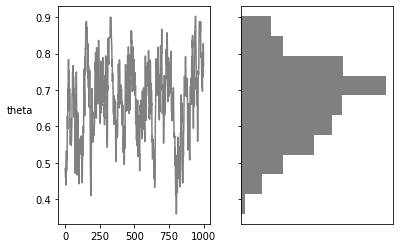

In [5]:
_, axes =  plt.subplots(1,2, sharey= True)
axes[0].plot(trace["theta"], "0.5")
axes[0].set_ylabel('theta', rotation=0, labelpad=15)
axes[1].hist(trace['theta'], color='0.5', orientation="horizontal", density=True)
axes[1].set_xticks([])


In [6]:
import pymc as pm
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
az.summary(trace, kind= "stats", round_to = 2)

,mean,sd,hdi_3%,hdi_97%
theta,0.67,0.11,0.48,0.87


## Automating Inference

In [8]:
with pm.Model() as model:
 theta = pm.Beta("theta", alpha=1, beta=1)
 y_obs = pm.Bernoulli("y_obs", p=theta, observed=Y)
 idata = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [15]:
pred_dists = (pm.sample_prior_predictive(1000, model)["y_obs"],
              pm.sample_posterior_predictive(idata, 1000, model)["y_obs"])

Sampling: [theta, y_obs]


KeyError: 'y_obs'